#Import Libraries

In [ ]:
from google.colab import drive

In [ ]:

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
import os


In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Split Test and Training Data 

In [ ]:
import splitfolders

In [ ]:
#split folder for train and test 
input_folder= "/content/drive/MyDrive/Junk_3110"
output= "/content/Junk_Data_Split"

splitfolders.ratio(input_folder, output=output,
    seed=1337, ratio=(.8, 0, .2), group_prefix=None, move=False) 


Copying files: 3110 files [01:30, 34.43 files/s]


In [ ]:
main_dir = "/content/Junk_Data_Split"
#set the path to the test dir
train_dir = os.path.join(main_dir, 'train' )
test_dir = os.path.join(main_dir, 'test' )

#directory with the training covid images
train_Abnormal_dir = os.path.join(train_dir, 'Junk_positive')

#directory with the training normal images

train_Normal_dir = os.path.join(train_dir, 'Junk_negative')

#directory with the testing covid images
test_Abnormal_dir = os.path.join(test_dir, 'Junk_positive')

#directory with the testing normal images
test_Normal_dir = os.path.join(test_dir, 'Junk_negative')

In [ ]:
train_Abnormal_names = os.listdir(train_Abnormal_dir)
print(train_Abnormal_dir[:10])

train_Normal_names = os.listdir(train_Normal_dir)
print(train_Normal_names[:10])

test_Abnormal_names = os.listdir(test_Abnormal_dir)
print(test_Abnormal_names[:10])

test_Normal_names = os.listdir(test_Normal_dir)
print(test_Normal_dir[:10])

/content/J
['00013443_006.png', '00024863_000.png', '00024697_000.png', '00029633_000.png', '00020532_000.png', '00005026_000.png', '00030686_000.png', '00004876_000.png', '00029998_004.png', '00019119_001.png']
['00027186_000.png', '00010531_071.png', '00022141_004.png', '00016812_000.png', '00002704_028.png', '00005795_000.png', '00023075_016.png', '00023294_000.png', '00012772_009.png', '00030093_000.png']
/content/J


In [ ]:
print('total images in training set: ', len(train_Abnormal_names+ train_Normal_names))
print('total images in testing set: ', len(test_Abnormal_names + test_Normal_names))

total images in training set:  2488
total images in testing set:  622


#Data Augmentation

In [ ]:
#generate training,testing and validation batches 
dgen_train = ImageDataGenerator(rescale= 1./255, 
                                validation_split= 0.2, 
                                zoom_range= 0.2,
                                horizontal_flip =False)
                                
dgen_validation = ImageDataGenerator(rescale= 1./255 )
dgen_test = ImageDataGenerator(rescale= 1./255)



train_generator= dgen_train.flow_from_directory(train_dir, 
                                                target_size= (256, 256), 
                                                color_mode= 'rgb',
                                                subset= "training", 
                                                batch_size= 128, 
                                                class_mode= "binary")

validation_generator= dgen_train.flow_from_directory(train_dir, 
                                                target_size= (256, 256),
                                                color_mode= 'rgb',
                                                subset= "validation", 
                                                batch_size= 128, 
                                                class_mode= "binary")

test_generator= dgen_test.flow_from_directory(test_dir, 
                                              target_size= (256, 256), 
                                              color_mode= 'rgb',
                                              batch_size= 128, 
                                              class_mode= "binary")


Found 1992 images belonging to 2 classes.
Found 496 images belonging to 2 classes.
Found 622 images belonging to 2 classes.


In [ ]:
#get the class indices
train_generator.class_indices

{'Junk_negative': 0, 'Junk_positive': 1}

In [ ]:
#image shape
train_generator.image_shape

(256, 256, 3)

#Model and Training

In [ ]:
model= tf.keras.models.Sequential([

tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
tf.keras.layers.MaxPooling2D(2, 2),

tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Flatten(),

tf.keras.layers.Dense(512, activation='relu'),

tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

In [ ]:
#compile the model
model.compile(Adam(learning_rate= 0.0001),loss = 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
#train the model
history = model.fit(train_generator,
                   epochs = 20,
                   validation_data = validation_generator) 


In [ ]:
#save model
model.save('Junk_data.h5')

#Evaluate Model

In [ ]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

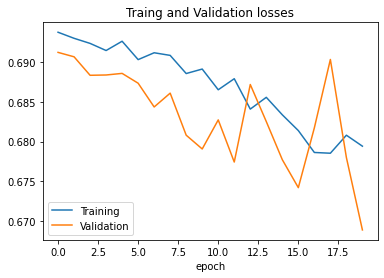

In [ ]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.legend(['Training', 'Validation'])
plt.title('Traing and Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

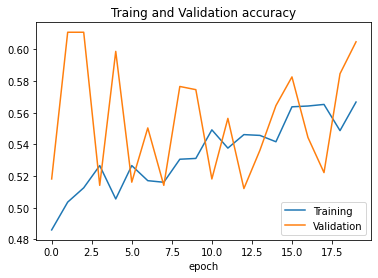

In [ ]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Traing and Validation accuracy')
plt.xlabel('epoch')

In [ ]:
# Re-evaluate the model
loss, acc = model.evaluate(validation_generator, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

4/4 - 12s - loss: 0.6813 - accuracy: 0.5847 - 12s/epoch - 3s/step
Restored model, accuracy: 58.47%
